# Predict survival on the Titanic
In this Lab, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy

### Dataset
The dataset contains 891 observations of 12 variables:
* **PassengerId**: Unique ID for each passenger
* **Survived**: Survival (0 = No; 1 = Yes)
* **Pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **Name**: Name
* **Sex**: Sex
* **Age**: Age
* **Sibsp**: Number of Siblings/Spouses Aboard
* **Parch**: Number of Parents/Children Aboard
* **Ticket**: Ticket Number
* **Fare**: Passenger Fare
* **Cabin**: Cabin
* **Embarked** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
# imports
import warnings
warnings.filterwarnings('ignore')
# your code here

In [5]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# print some info about the dataframe
print ('the data frame has a shape :', titanic.shape)

the data frame has a shape : (891, 12)


Looks like there are some Nan values, let's see how many for each column

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Cabin** contains a lot of Nan values, we'll drop this column <br>
We'll replace the Nan values in **Age** with the age's median, and the ones in **Embarked** with **'S'**, which is the most frequent one in this column

In [9]:
# your code here to drop Cabin
titanic = titanic.drop(['Cabin'], axis= 1)
# check the fillna documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
titanic["Age"]= titanic["Age"].fillna(titanic["Age"].median())
titanic["Embarked"] = titanic["Embarked"].fillna('S')
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Visualization

survival rate = 0.3838383838383838


<AxesSubplot:title={'center':"Label's Balance"}, xlabel='Survived'>

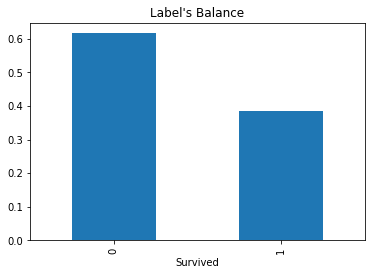

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
print ('survival rate =', titanic.Survived.mean())
(titanic.groupby('Survived').size()/titanic.shape[0]).plot(kind="bar",title="Label's Balance")


### Comment
#### Here we got the average of people who survived (or not) the disaster, most of them, unfortunately, didn't survive.

In [11]:
# make a function to plot survival against passenger attribute
def survival_rate(column,t):
    df=pd.DataFrame()
    df['total']=titanic.groupby(column).size()
    df['survived'] = titanic.groupby(column).sum()['Survived']
    df['percentage'] = round(df['survived']/df['total']*100,2)
    print(df)

    df['survived'].plot(kind=t)
    df['total'].plot(kind=t,alpha=0.5,title="Survivors per "+str(column))
    plt.show()

        total  survived  percentage
Sex                                
female    314       233       74.20
male      577       109       18.89


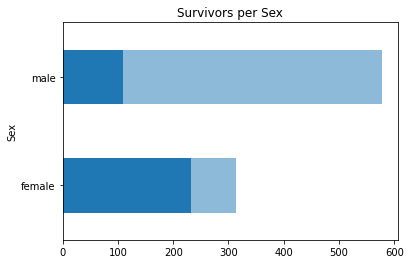

In [12]:
# Draw survival per Sex
survival_rate("Sex","barh")

### Comment
##### We can see that there was more men registered in the boat but even though, more women survived, we can maybe explain this by the fact that women have priority over men in rescuing people (which is normal)

        total  survived  percentage
Pclass                             
1         216       136       62.96
2         184        87       47.28
3         491       119       24.24


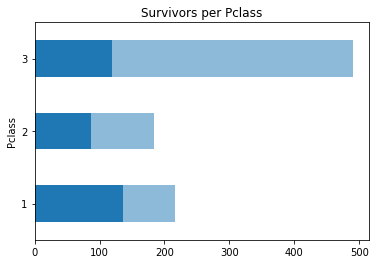

In [13]:
# Draw survival per Class
survival_rate("Pclass","barh")

### Comment
#### You have a better probability to survive when you are in 1st class than the others

          total  survived  percentage
Embarked                             
C           168        93       55.36
Q            77        30       38.96
S           646       219       33.90


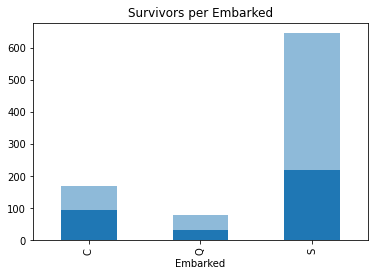

In [14]:
# Graph survived per port of embarkation
survival_rate("Embarked","bar")

#### Comment
##### People who embarked from cherbourg survived more than the two others, we don't have explanation for this

       total  survived  percentage
Parch                             
0        678       233       34.37
1        118        65       55.08
2         80        40       50.00
3          5         3       60.00
4          4         0        0.00
5          5         1       20.00
6          1         0        0.00


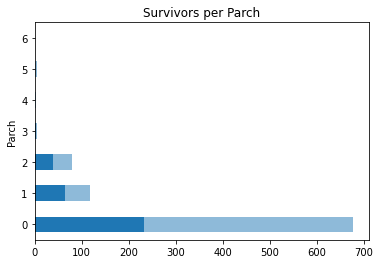

In [15]:
# Draw survived per Number of Parents/Children Aboard (Parch)
survival_rate("Parch","barh")

### Coment 
#### There is not much to say here, I think the more parent/children you have, it's pretty more difficult to survived in this type of situation

       total  survived  percentage
SibSp                             
0        608       210       34.54
1        209       112       53.59
2         28        13       46.43
3         16         4       25.00
4         18         3       16.67
5          5         0        0.00
8          7         0        0.00


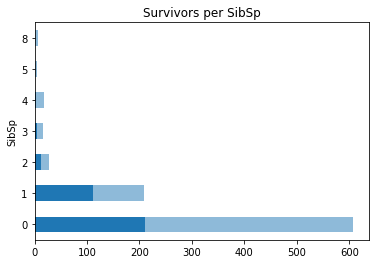

In [16]:
# Draw survived per Number of Siblings/Spouses Aboard (SibSp)
survival_rate("SibSp","barh")

### Comment
#### We got almost the result as the graph above it, same description...

## Model training

Some of the columns don't have predictive power, so let's specify which ones are included for prediction

In [17]:
predictors = ["Pclass", "Sex", "Age", 'SibSp' ,'Parch', "Fare", "Embarked"]  

We need now to convert text columns in **predictors** to numerical ones

In [18]:
for col in predictors: # Loop through all columns in predictors
    if titanic[col].dtype == 'object':  # check if column's type is object (text)
        titanic[col] = pd.Categorical(titanic[col]).codes  # convert text to numerical

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


#### NB : 
##### Sex : 1 for male and 0 for female
##### Embarked : 0 for Cherbourg, 1 for Queenston and 2 for Southampton

In [19]:
# Split the data into a training set and a testing set. Set: test_size=0.3, random_state=1
from sklearn.model_selection import train_test_split

X = titanic[predictors]
y = titanic["Survived"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3 , random_state = 1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (623, 7) (623,)
test shape (268, 7) (268,)


In [20]:
# import LogisticRegression from: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=1)

clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.8073836276083467
test accuracy = 0.7723880597014925


#### Comment
##### Results are pretty similar to be honest

Let's print the model's parameters

In [21]:
coeff = pd.DataFrame()
coeff['Feature'] = X_train.columns
coeff['Coefficient Estimate'] = pd.Series(clf.coef_[0])
coeff.loc[len(coeff)]=['Intercept',clf.intercept_[0]]
print (coeff)

     Feature  Coefficient Estimate
0     Pclass             -1.158693
1        Sex             -2.708761
2        Age             -0.040634
3      SibSp             -0.334012
4      Parch              0.071939
5       Fare             -0.000570
6   Embarked             -0.223307
7  Intercept              5.391545


#### Comment
#### If the coefficient is negative, it's because the independent variable ("Survived") has a negative effect to the dependent variables (predictors), which means when the independant variable increases, the dependent variable decreases and inversely

We now need to predict class labels for the test set. We will also generate the class probabilities

In [22]:
# predict class labels for the test set
y_pred = clf.predict(X_test)
print (y_pred)

[1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0
 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 0 0 1 0]


In [23]:
# generate class probabilities : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
y_probs = clf.predict_proba(X_test)
print (y_probs)

[[0.13931138 0.86068862]
 [0.91545699 0.08454301]
 [0.12666421 0.87333579]
 [0.36591842 0.63408158]
 [0.07784301 0.92215699]
 [0.89067951 0.10932049]
 [0.80772606 0.19227394]
 [0.11922783 0.88077217]
 [0.49862954 0.50137046]
 [0.44730682 0.55269318]
 [0.90553194 0.09446806]
 [0.39942792 0.60057208]
 [0.75883959 0.24116041]
 [0.7731844  0.2268156 ]
 [0.36586717 0.63413283]
 [0.51884413 0.48115587]
 [0.92555342 0.07444658]
 [0.92813017 0.07186983]
 [0.93745225 0.06254775]
 [0.23336019 0.76663981]
 [0.92721772 0.07278228]
 [0.89953162 0.10046838]
 [0.03807373 0.96192627]
 [0.70151645 0.29848355]
 [0.27209457 0.72790543]
 [0.91229352 0.08770648]
 [0.06263097 0.93736903]
 [0.2862834  0.7137166 ]
 [0.75835591 0.24164409]
 [0.05700657 0.94299343]
 [0.36148881 0.63851119]
 [0.51940626 0.48059374]
 [0.52697857 0.47302143]
 [0.47141328 0.52858672]
 [0.93503277 0.06496723]
 [0.48609827 0.51390173]
 [0.59876817 0.40123183]
 [0.91543125 0.08456875]
 [0.46440486 0.53559514]
 [0.88665973 0.11334027]


As you can see, the classifier outputs two probabilities for each row. It's predicting a 1 (Survived) any time the probability in the second column is greater than 0.5. Let's visualize it all together.

In [24]:
import numpy as np

In [25]:
pred = pd.DataFrame({        
        "Survived_original": y_test,
        "Survived_predicted": y_pred,
        "Survived_proba": np.transpose(y_probs)[1]      
        })
pred["Comparison"]= pred.Survived_original ==pred.Survived_predicted
pred.head()

,Survived_original,Survived_predicted,Survived_proba,Comparison
862,1,1,0.860689,True
223,0,0,0.084543,True
84,1,1,0.873336,True
680,0,1,0.634082,False
535,1,1,0.922157,True


## Confusion matrix

In [26]:
from sklearn import metrics
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

[[129  24]
 [ 37  78]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       153
           1       0.76      0.68      0.72       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



As you can see, we can have the classification report for each class

## K-Fold Cross Validation

In [27]:
# import cross_validation from: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_validate, cross_val_score


clf = LogisticRegression(random_state=1)
scores = cross_val_score(clf, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
## see model 
print(scores)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

[0.7877095  0.78651685 0.78089888 0.76966292 0.82022472]
0.7890025735986442


When you are improving a model, you want to make sur that you are really doing it and not just being lucky. This is why it's good to work with cross validation instead of one train/test split.

#### Comment :
##### We can see that even if we are using one train/test split or a cross validation, we are getting almost the same results, that's a good sign